In [1]:
import pandas as pd
base = pd.read_csv("dengue_sinan.csv")

C:\Users\elisa\AppData\Local\Temp\ipykernel_5776\1414323177.py:2: DtypeWarning: Columns (30,31,53,54,55,59,61,63,65,71,83,89,100,116,131,137) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv("dengue_sinan.csv")


In [4]:
display(base)

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,...,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,158,2,A90,2016-03-05,201609,2016,29,292210,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,298,2,A90,2016-02-15,201607,2016,29,293290,1385.0,3280969.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,ebc774c2fc9be73f8d403772dc14539dbe6e448e117f62...
2,5082,2,A90,2016-03-25,201612,2016,29,293250,1385.0,2800527.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,e0f037bc45eeea73df919230256055724a0bc45b990d62...
3,111262,2,A90,2016-03-24,201612,2016,29,291360,1385.0,2706628.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
4,166,2,A90,2016-03-13,201611,2016,29,292210,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,595d3ab2cc2bfc76ee1e9ef090ac6abf0e7b64aee90e92...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,7061,2,A90,2024-02-21,202408,2024,29,292300,1388.0,2506254.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,4ca7df06d628b3ec9fcf8f4a3a8b11661f5e98b8e54b34...
620207,1257,2,A90,2024-03-04,202410,2024,29,291980,1398.0,7175973.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,5152560db10a8bc76f1490909a74620605b6f3b512e8d7...
620208,372024,2,A90,2024-01-26,202404,2024,29,292303,1381.0,6540007.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,d7c7bebe87009f4f9e4a606f6fe2ddc83a67ea3c48ada8...
620209,128,2,A90,2024-02-19,202408,2024,29,291400,1381.0,2824558.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...


In [5]:
base.nunique()

NU_NOTIFIC           185124
TP_NOT                    2
ID_AGRAVO                 1
DT_NOTIFIC             3015
SEM_NOT                 432
                      ...  
CS_FLXRET                 2
FLXRECEBI                 0
IDENT_MICR                7
MIGRADO_W                 0
ID_CNS_SUS_HASHED    339941
Length: 148, dtype: int64

In [4]:
numeric_df = base.select_dtypes(include=['int','float'])
correlation_matrix = numeric_df.corr()
target_correlations = correlation_matrix['CLASSI_FIN'].sort_values(ascending=False)
display(target_correlations)



PLAQ_MENOR    1.0
LACO_N        1.0
HEMATURA      1.0
PETEQUIAS     1.0
CLASSI_FIN    1.0
             ... 
DT_TRANSSE    NaN
NU_LOTE_V     NaN
NU_LOTE_H     NaN
FLXRECEBI     NaN
MIGRADO_W     NaN
Name: CLASSI_FIN, Length: 123, dtype: float64

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(55,35))
sns.barplot(x=target_correlations.index, y=target_correlations.values, palette='coolwarm')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=45)
plt.show()


NameError: name 'target_correlations' is not defined

<Figure size 5500x3500 with 0 Axes>

In [8]:
novabase = base[[
    "ID_AGRAVO",
    "DT_INVEST",
    "FEBRE",
    "MIALGIA",
    "CEFALEIA",
    "EXANTEMA",
    "VOMITO",
    "NAUSEA",
    "DOR_COSTAS",
    "CONJUNTVIT",
    "ARTRITE",
    "ARTRALGIA",
    "PETEQUIA_N",
    "LEUCOPENIA",
    "LACO",
    "DOR_RETRO",
    "DIABETES",
    "HEMATOLOG",
    "HEPATOPAT",
    "RENAL",
    "HIPERTENSA",
    "ACIDO_PEPT",
    "AUTO_IMUNE",
    "SOROTIPO",
    "CLASSI_FIN",
    "CRITERIO",
    "CLINC_CHIK",
    "ALRM_HIPOT",
    "ALRM_PLAQ",
    "ALRM_VOM",
    "ALRM_ABDOM",
    "ALRM_LETAR",
    "ALRM_SANG",
    "ALRM_HEMAT",
    "ALRM_HEPAT",
    "ALRM_LIQ",
    "DT_ALRM",
    "GRAV_PULSO",
    "GRAV_CONV",
    "GRAV_ENCH",
    "GRAV_INSUF",
    "GRAV_TAQUI",
    "GRAV_EXTRE",
    "GRAV_HIPOT",
    "GRAV_HEMAT",
    "GRAV_MELEN",
    "GRAV_METRO",
    "GRAV_SANG",
    "GRAV_AST",
    "GRAV_MIOC",
    "GRAV_CONSC",
    "GRAV_ORGAO",
    "DT_GRAV",
    "ID_OCUPA_N",
    "HOSPITALIZ",
    "EVOLUCAO",
    "TPAUTOCTO",
    "COUFINF",
    "COPAISINF",
    "COMUNINF",
    "CODISINF",
    "CO_BAINF",
    "NOBAIINF",
    "RES_CHIKS1",
    "RES_CHIKS2",
    "RESUL_PRNT",
    "RESUL_SORO",
    "RESUL_NS1",
    "RESUL_VI_N",
    "RESUL_PCR_",
    "HISTOPA_N",
    "IMUNOH_N"
 ]].copy()


In [10]:
display(novabase)

,ID_AGRAVO,DT_INVEST,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,...,NOBAIINF,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N
0,A90,2016-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A90,2016-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A90,2016-03-25,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0
3,A90,2016-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A90,2016-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,A90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620207,A90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620208,A90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620209,A90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
novabase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620211 entries, 0 to 620210
Data columns (total 72 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID_AGRAVO   620211 non-null  object 
 1   DT_INVEST   555845 non-null  object 
 2   FEBRE       540788 non-null  float64
 3   MIALGIA     540788 non-null  float64
 4   CEFALEIA    540788 non-null  float64
 5   EXANTEMA    540788 non-null  float64
 6   VOMITO      540788 non-null  float64
 7   NAUSEA      540788 non-null  float64
 8   DOR_COSTAS  540788 non-null  float64
 9   CONJUNTVIT  540788 non-null  float64
 10  ARTRITE     540788 non-null  float64
 11  ARTRALGIA   540788 non-null  float64
 12  PETEQUIA_N  540788 non-null  float64
 13  LEUCOPENIA  540788 non-null  float64
 14  LACO        540788 non-null  float64
 15  DOR_RETRO   540788 non-null  float64
 16  DIABETES    540788 non-null  float64
 17  HEMATOLOG   540788 non-null  float64
 18  HEPATOPAT   540788 non-null  float64
 19  RE

In [10]:
novabase.nunique()

ID_AGRAVO        1
DT_INVEST     3015
FEBRE            2
MIALGIA          2
CEFALEIA         2
              ... 
RESUL_NS1        4
RESUL_VI_N       4
RESUL_PCR_       4
HISTOPA_N        4
IMUNOH_N         4
Length: 72, dtype: int64

In [12]:
novabase_numerica = novabase.select_dtypes(include=['number'])
matrizcorrelacao = novabase_numerica.corr()
targetcorrelacoes = matrizcorrelacao['CLASSI_FIN'].sort_values(ascending=False)
display(targetcorrelacoes)

CLASSI_FIN    1.000000
CRITERIO      0.289130
RESUL_PCR_    0.153104
RES_CHIKS1    0.149527
RES_CHIKS2    0.095022
                ...   
DOR_RETRO    -0.051832
ALRM_HEMAT   -0.053627
FEBRE        -0.056944
TPAUTOCTO    -0.129126
ALRM_PLAQ    -0.148195
Name: CLASSI_FIN, Length: 66, dtype: float64

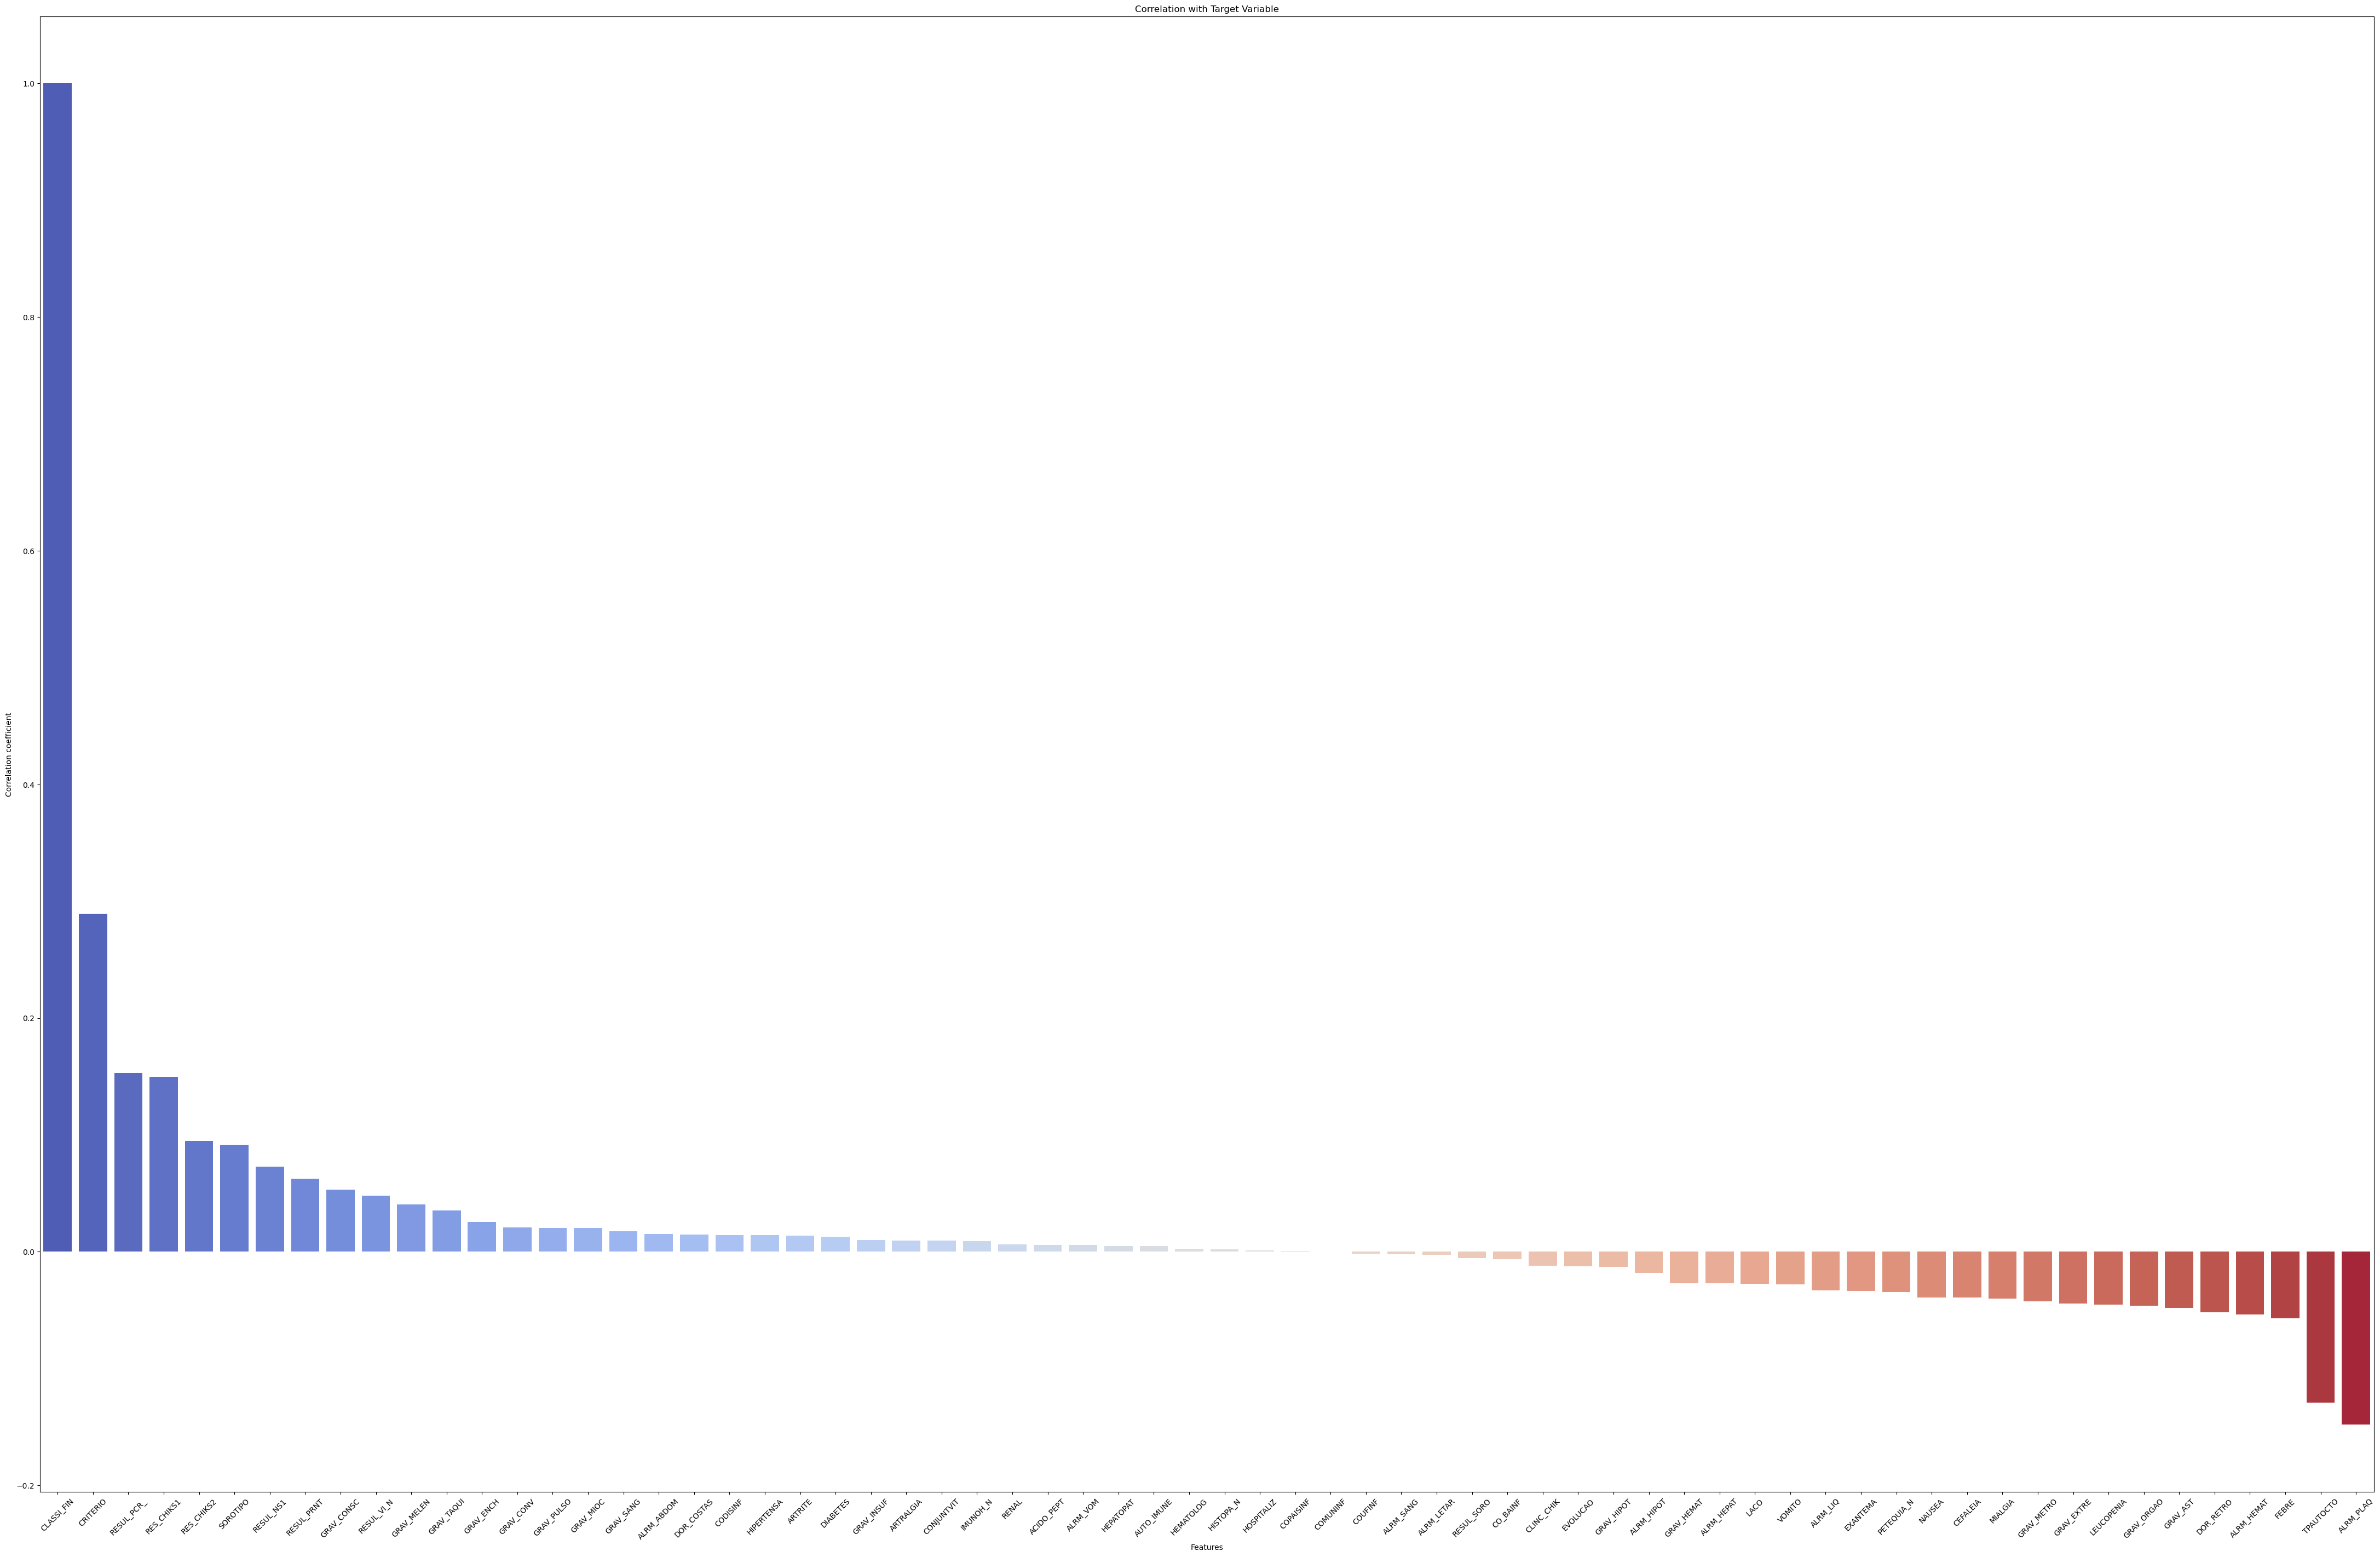

In [13]:
plt.figure(figsize=(55,35))
sns.barplot(x=targetcorrelacoes.index, y=targetcorrelacoes.values, palette='coolwarm')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=45)
plt.show()

In [13]:
numeric_df = novabase.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
display(correlation_matrix['CLASSI_FIN'])



FEBRE        -0.056944
MIALGIA      -0.040121
CEFALEIA     -0.039432
EXANTEMA     -0.033685
VOMITO       -0.028199
                ...   
RESUL_NS1     0.072657
RESUL_VI_N    0.048121
RESUL_PCR_    0.153104
HISTOPA_N     0.001845
IMUNOH_N      0.009227
Name: CLASSI_FIN, Length: 66, dtype: float64

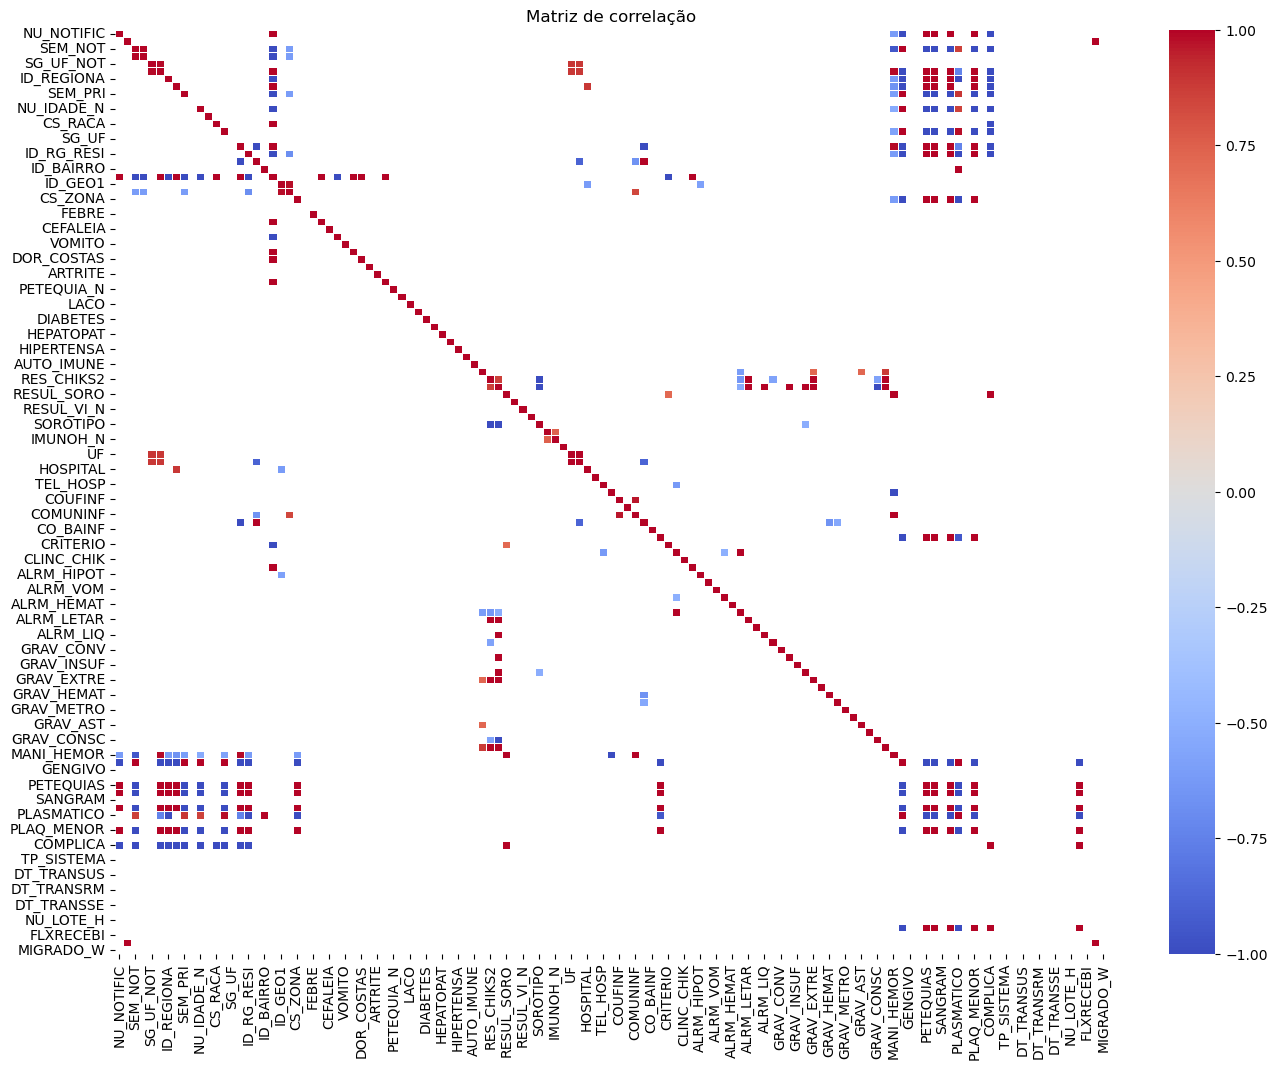

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.7) | (correlation_matrix <= -0.5)], annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlação')
plt.show()

In [14]:
novabase.describe()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,CO_BAINF,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N
count,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,...,4.344800e+04,6151.000000,4886.000000,5016.000000,240156.000000,181470.000000,162017.000000,174076.000000,139824.000000,140095.000000
mean,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,1.959823,1.893396,1.729715,...,6.215275e+02,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
std,0.346910,0.440871,0.424991,0.396011,0.429439,0.470291,0.446099,0.196373,0.308609,0.444108,...,5.852071e+04,1.102448,0.432386,0.435450,1.256585,0.986671,0.236185,0.694806,0.149423,0.144132
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.800000e+01,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,8.000000e+01,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.140000e+02,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.111111e+07,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [15]:
novabase[[  "FEBRE",
    "MIALGIA",
    "CEFALEIA",
    "EXANTEMA",
    "VOMITO",
    "NAUSEA",
    "DOR_COSTAS",
    "CONJUNTVIT",
    "ARTRITE",
    "ARTRALGIA",
    "PETEQUIA_N",
    "LEUCOPENIA",
    "LACO",
    "DOR_RETRO",
    "DIABETES",
    "HEMATOLOG",
    "HEPATOPAT",
    "RENAL",
    "HIPERTENSA",
    "ACIDO_PEPT",
    "AUTO_IMUNE"]].value_counts()

FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LEUCOPENIA  LACO  DOR_RETRO  DIABETES  HEMATOLOG  HEPATOPAT  RENAL  HIPERTENSA  ACIDO_PEPT  AUTO_IMUNE
1.0    1.0      1.0       2.0       2.0     2.0     2.0         2.0         2.0      2.0        2.0         2.0         2.0   2.0        2.0       2.0        2.0        2.0    2.0         2.0         2.0           53648
2.0    2.0      2.0       2.0       2.0     2.0     2.0         2.0         2.0      2.0        2.0         2.0         2.0   2.0        2.0       2.0        2.0        2.0    2.0         2.0         2.0           15898
1.0    1.0      1.0       2.0       2.0     2.0     2.0         2.0         2.0      2.0        2.0         2.0         2.0   1.0        2.0       2.0        2.0        2.0    2.0         2.0         2.0           14991
                                                                                     1.0        2.0         2.0         2.0   2.0

In [10]:
novabase[[
    "SOROTIPO",
    "RES_CHIKS1",
    "RES_CHIKS2",
    "RESUL_PRNT",
    "RESUL_SORO",
    "RESUL_NS1",
    "RESUL_VI_N",
    "HISTOPA_N",
    "IMUNOH_N",
    "TPAUTOCTO",
    "COUFINF",
    "COPAISINF",
    "COMUNINF",
    "CODISINF",
    "CO_BAINF",
    "NOBAIINF"
]].isnull().sum()

SOROTIPO      615678
RES_CHIKS1    614060
RES_CHIKS2    615325
RESUL_PRNT    615195
RESUL_SORO    380055
RESUL_NS1     438741
RESUL_VI_N    458194
HISTOPA_N     480387
IMUNOH_N      480116
TPAUTOCTO     446796
COUFINF       463005
COPAISINF     462986
COMUNINF      463998
CODISINF      614866
CO_BAINF      576763
NOBAIINF      567967
dtype: int64

  ID_AGRAVO   DT_INVEST     FEBRE   MIALGIA  CEFALEIA  EXANTEMA    VOMITO  \
0       A90  2016-03-05  1.139925  1.264133  1.236594  1.805247  1.756091   
1       A90  2016-02-15  1.139925  1.264133  1.236594  1.805247  1.756091   
2       A90  2016-03-25  2.000000  1.000000  1.000000  2.000000  2.000000   
3       A90  2016-03-24  1.139925  1.264133  1.236594  1.805247  1.756091   
4       A90  2016-03-13  1.139925  1.264133  1.236594  1.805247  1.756091   

     NAUSEA  DOR_COSTAS  CONJUNTVIT  ...  NOBAIINF  RES_CHIKS1  RES_CHIKS2  \
0  1.669784    1.725822    1.959823  ...    CENTRO    3.314746    3.908719   
1  1.669784    1.725822    1.959823  ...    CENTRO    3.314746    3.908719   
2  2.000000    2.000000    2.000000  ...    CENTRO    3.314746    3.908719   
3  1.669784    1.725822    1.959823  ...    CENTRO    3.314746    3.908719   
4  1.669784    1.725822    1.959823  ...    CENTRO    3.314746    3.908719   

   RESUL_PRNT  RESUL_SORO  RESUL_NS1  RESUL_VI_N  RESUL_PCR_  HISTOP

<Axes: >

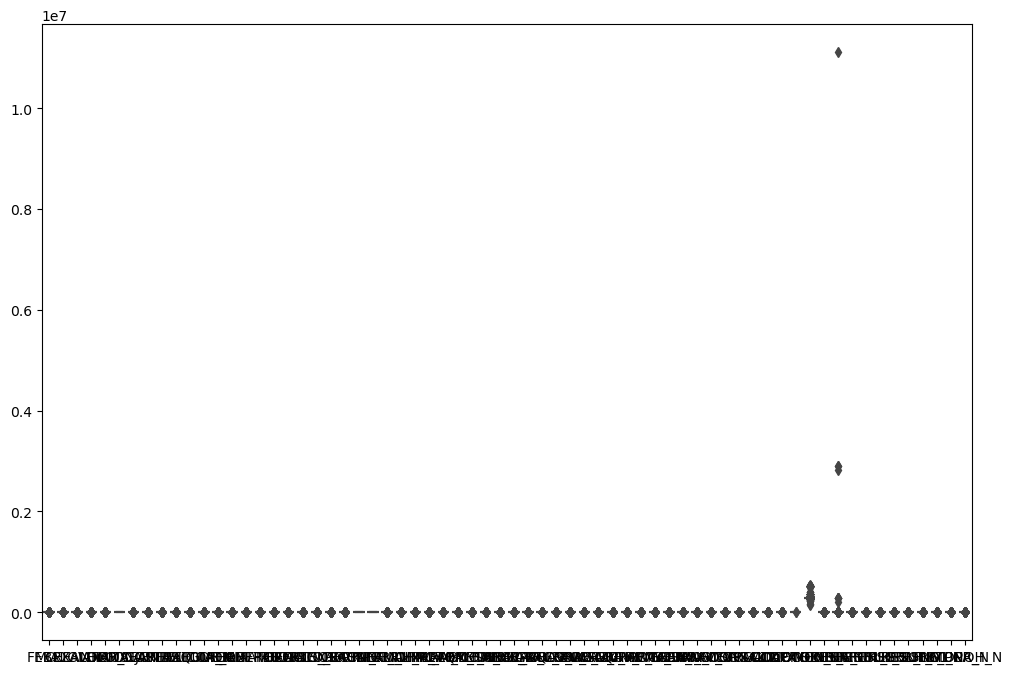

In [11]:
novabase.replace({'Sim': 1, 'Não': 0}, inplace=True)

for column in novabase.columns:
        if novabase[column].dtype == 'float64' or novabase[column].dtype == 'int64':
            novabase[column].fillna(novabase[column].mean(), inplace=True)
        else:
            novabase[column].fillna(novabase[column].mode()[0], inplace=True)

    # Verificar o DataFrame após a limpeza
print(novabase.head())

    # Gráficos para variáveis quantitativas após limpeza

    # Boxplot após limpeza
novabase_numerica = novabase.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.boxplot(data=novabase)


In [19]:
novabase[[  "FEBRE",
    "MIALGIA",
    "CEFALEIA",
    "EXANTEMA",
    "VOMITO",
    "NAUSEA",
    "DOR_COSTAS",
    "CONJUNTVIT",
    "ARTRITE",
    "ARTRALGIA",
    "PETEQUIA_N",
    "LEUCOPENIA",
    "LACO",
    "DOR_RETRO",
    "DIABETES",
    "HEMATOLOG",
    "HEPATOPAT",
    "RENAL",
    "HIPERTENSA",
    "ACIDO_PEPT",
    "AUTO_IMUNE"]].isnull().sum()

FEBRE         0
MIALGIA       0
CEFALEIA      0
EXANTEMA      0
VOMITO        0
NAUSEA        0
DOR_COSTAS    0
CONJUNTVIT    0
ARTRITE       0
ARTRALGIA     0
PETEQUIA_N    0
LEUCOPENIA    0
LACO          0
DOR_RETRO     0
DIABETES      0
HEMATOLOG     0
HEPATOPAT     0
RENAL         0
HIPERTENSA    0
ACIDO_PEPT    0
AUTO_IMUNE    0
dtype: int64

In [20]:
novabase[[
    "SOROTIPO",
    "RES_CHIKS1",
    "RES_CHIKS2",
    "RESUL_PRNT",
    "RESUL_SORO",
    "RESUL_NS1",
    "RESUL_VI_N",
    "HISTOPA_N",
    "IMUNOH_N",
    "TPAUTOCTO",
    "COUFINF",
    "COPAISINF",
    "COMUNINF",
    "CODISINF",
    "CO_BAINF",
    "NOBAIINF"
]].isnull().sum()

SOROTIPO      0
RES_CHIKS1    0
RES_CHIKS2    0
RESUL_PRNT    0
RESUL_SORO    0
RESUL_NS1     0
RESUL_VI_N    0
HISTOPA_N     0
IMUNOH_N      0
TPAUTOCTO     0
COUFINF       0
COPAISINF     0
COMUNINF      0
CODISINF      0
CO_BAINF      0
NOBAIINF      0
dtype: int64

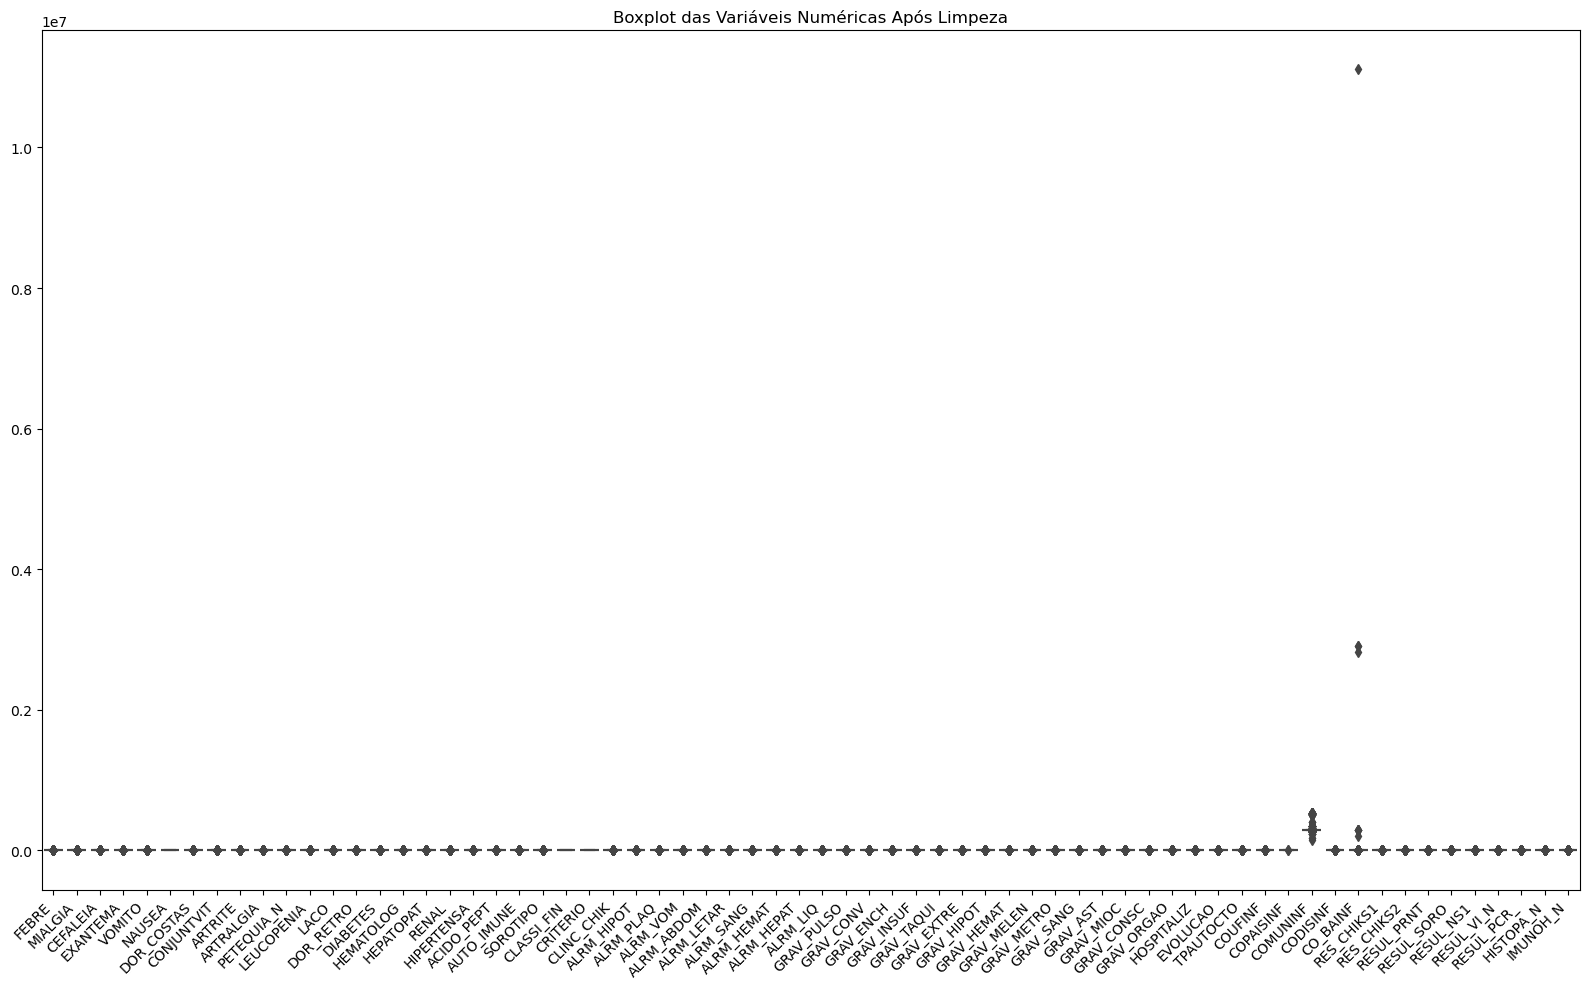

In [12]:
# Gráfico 1: Boxplot das Variáveis Numéricas Após Limpeza
novabase_numerica = novabase.select_dtypes(include=['number'])

plt.figure(figsize=(16, 10))
sns.boxplot(data=novabase_numerica)
plt.title('Boxplot das Variáveis Numéricas Após Limpeza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

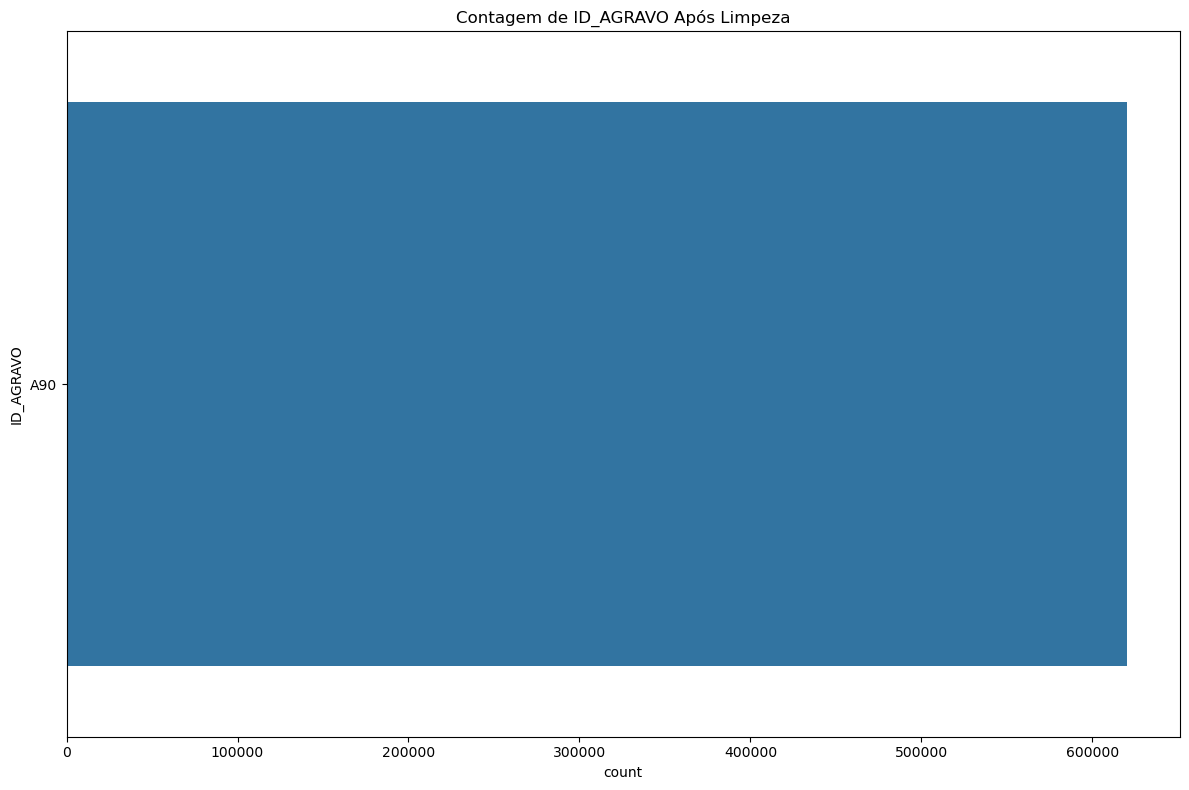

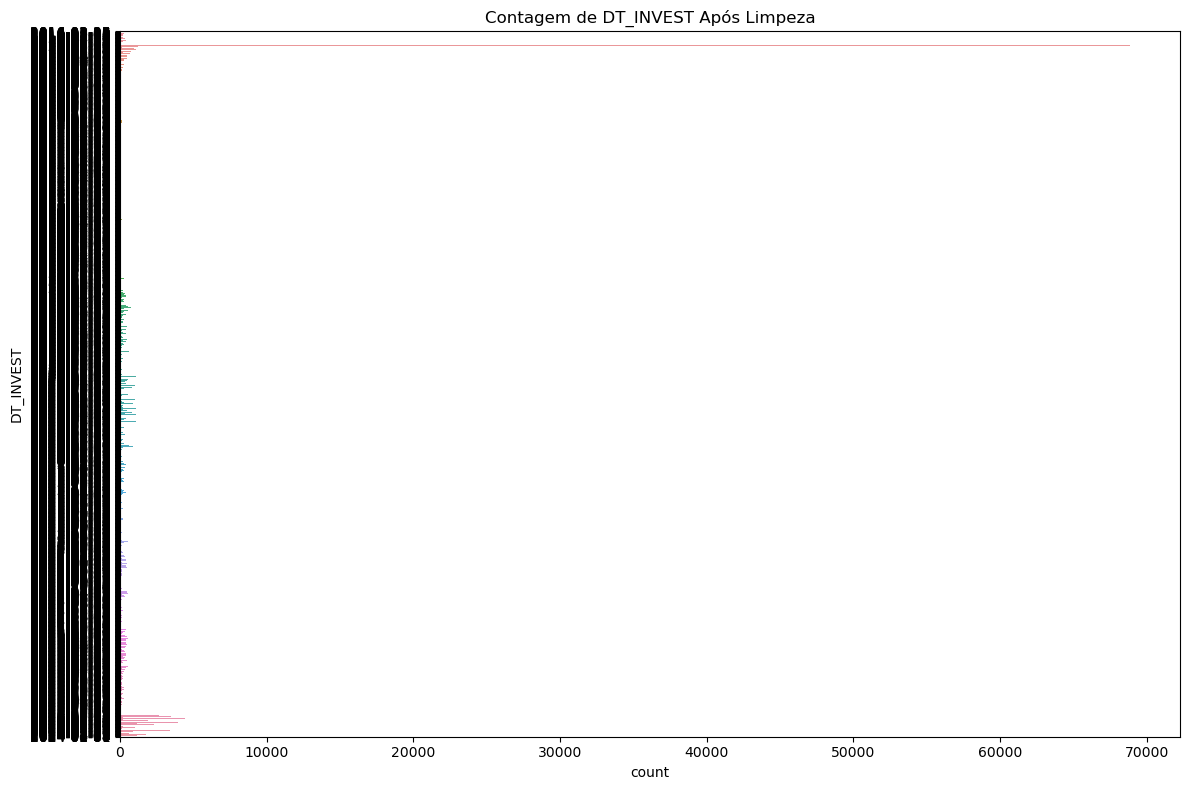

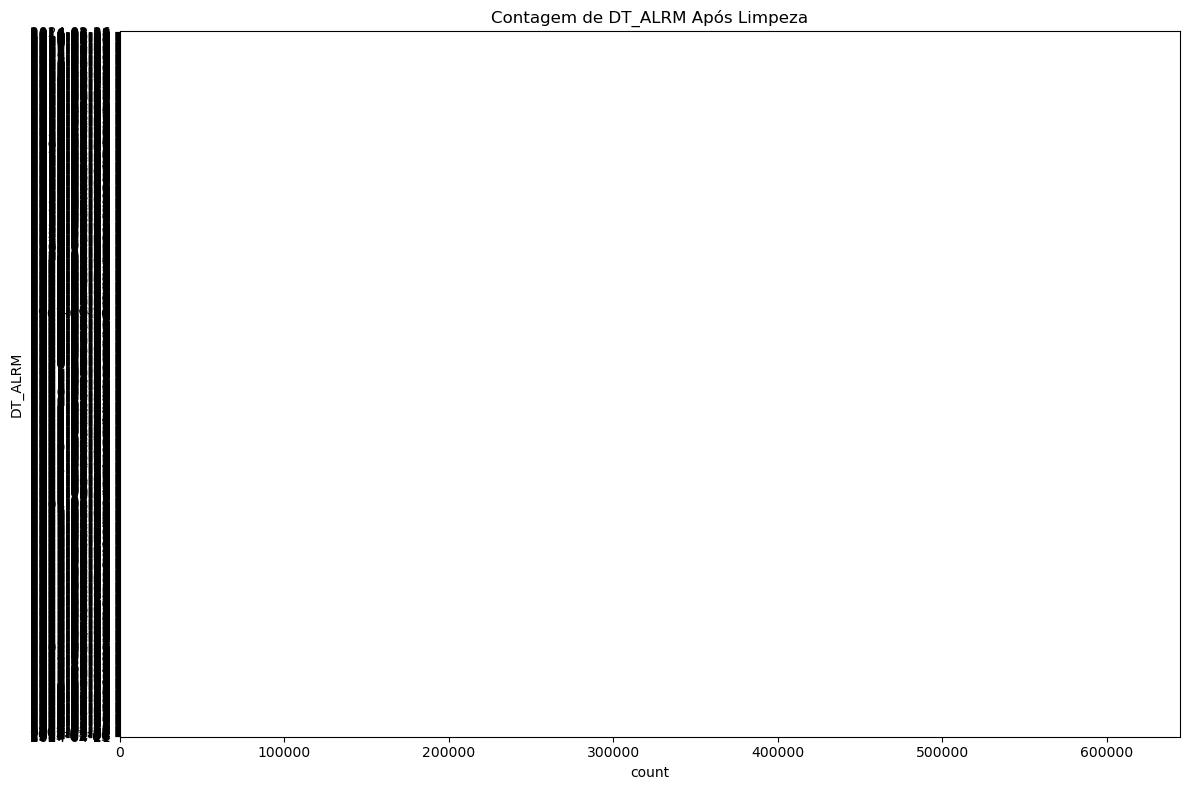

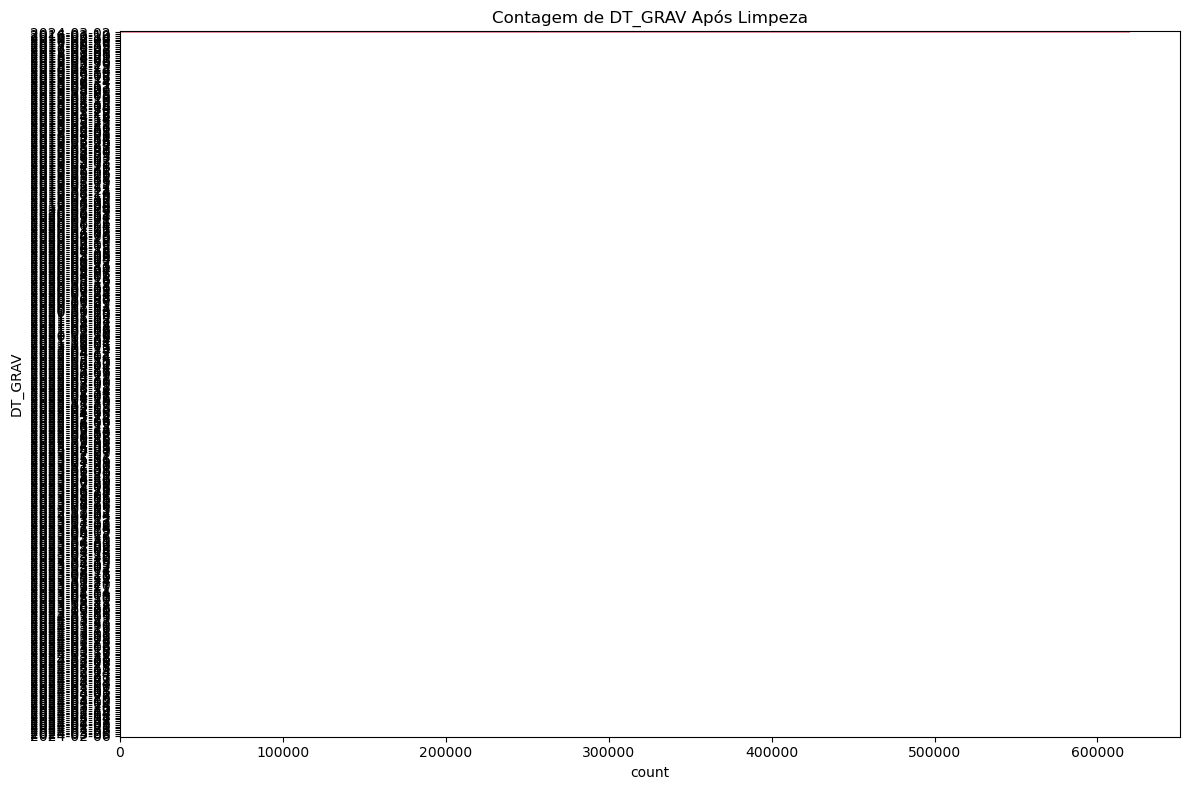

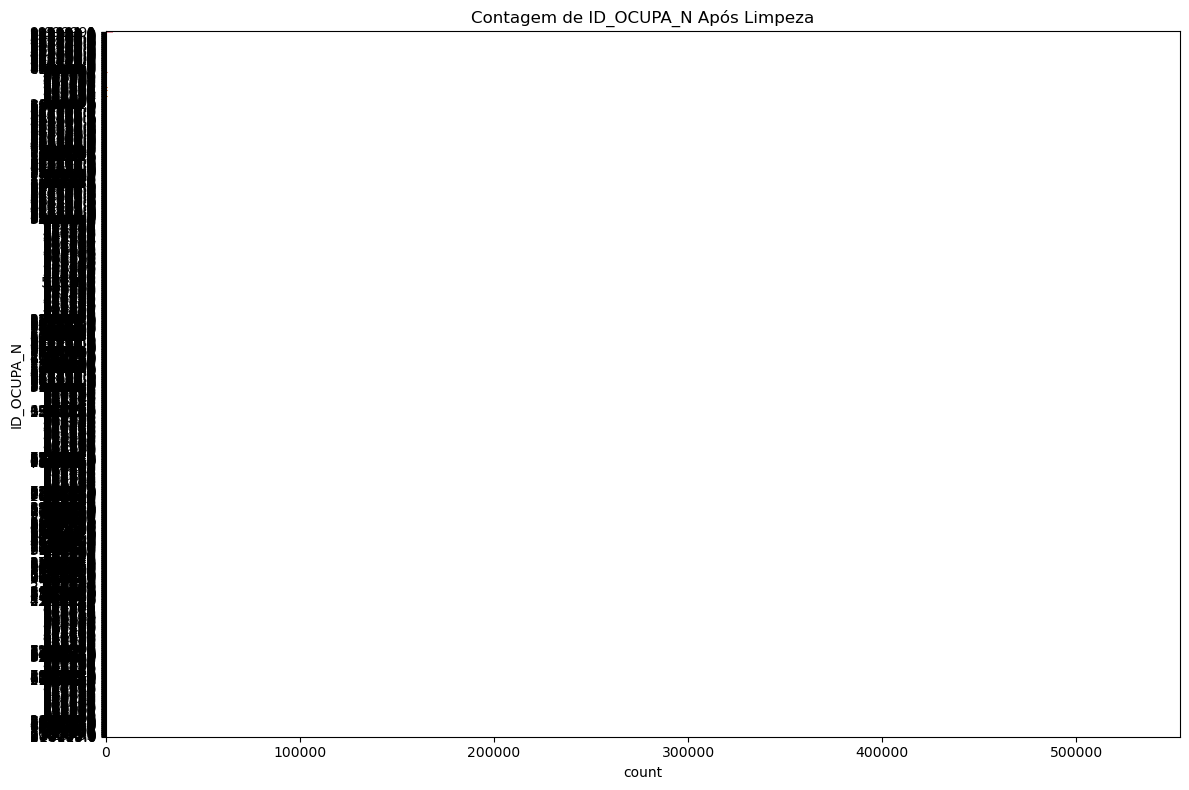

C:\Users\elisa\AppData\Local\Temp\ipykernel_13092\261330713.py:7: UserWarning: Glyph 127 () missing from current font.
  plt.tight_layout()
c:\Users\elisa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


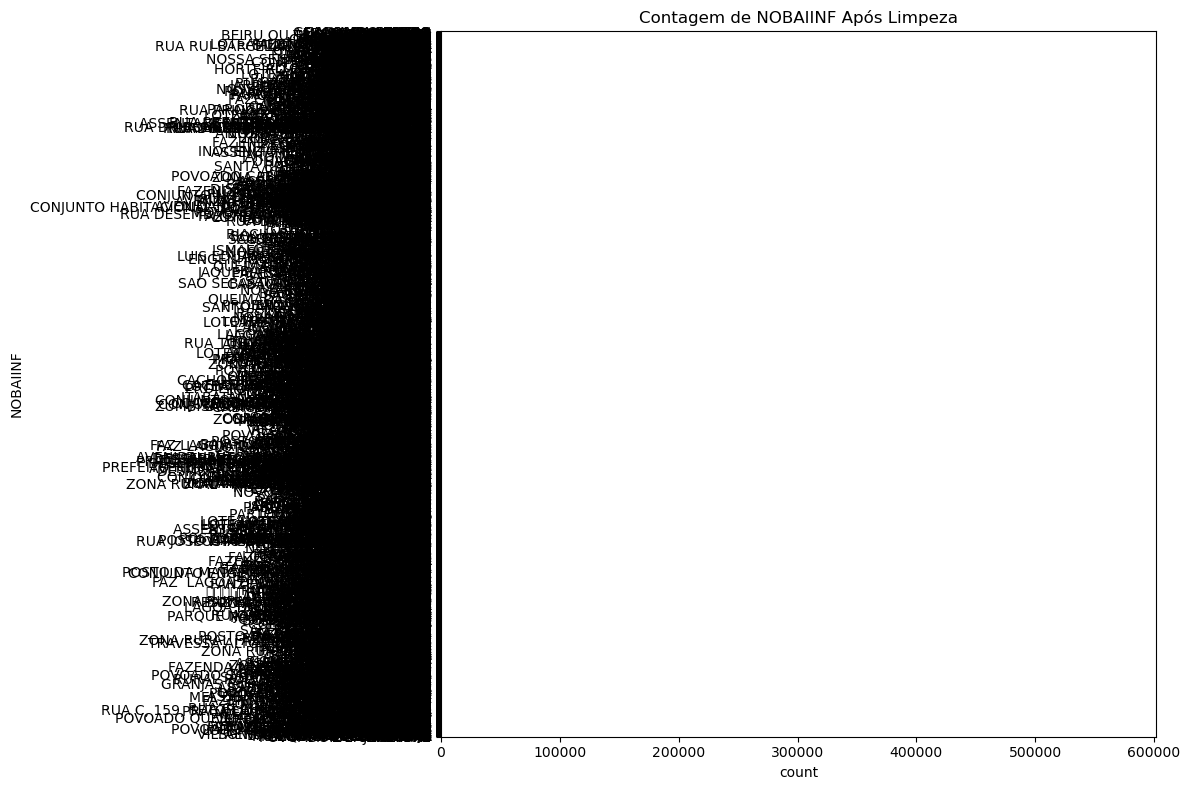

In [29]:
 # Gráfico 2: Gráfico de Barras para Variáveis Qualitativas
plt.figure(figsize=(16, 10))
for column in novabase.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(y=column, data=novabase)
    plt.title(f'Contagem de {column} Após Limpeza')
    plt.tight_layout()
    plt.show()

In [ ]:
print("Hello world")

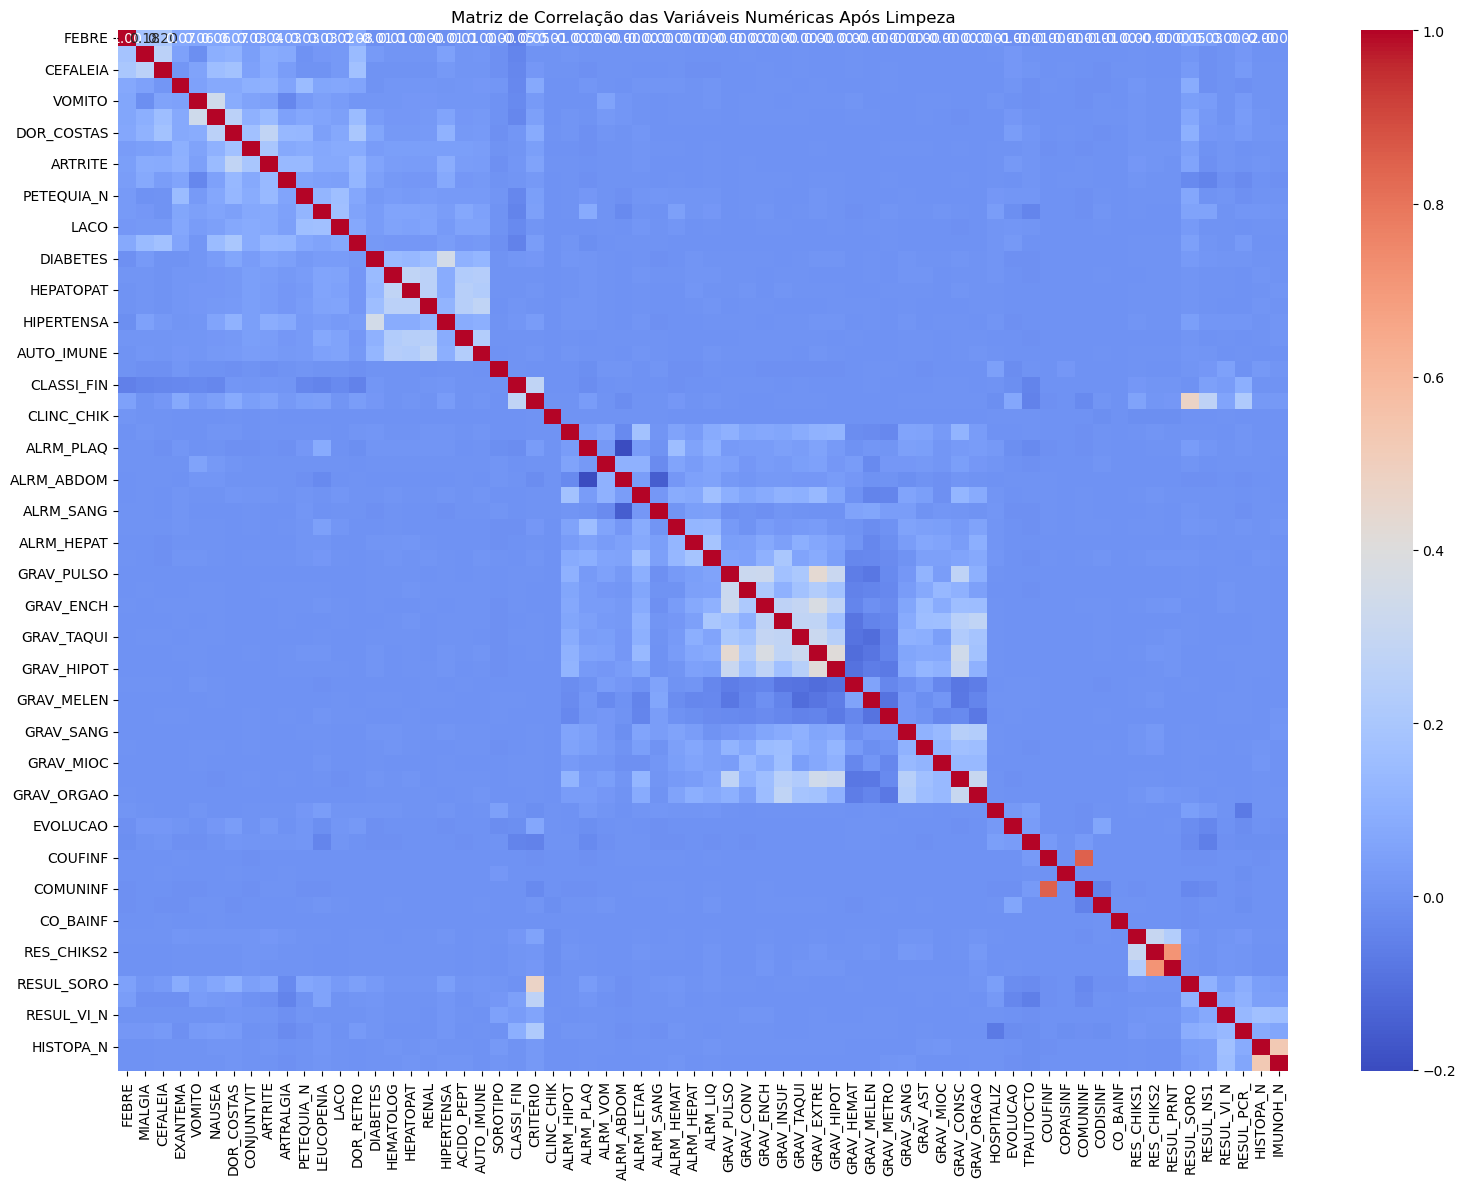

In [13]:
  # Gráfico 3: Matriz de Correlação das Variáveis Numéricas Após Limpeza
plt.figure(figsize=(16, 12))
corr_matrix = novabase_numerica.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Numéricas Após Limpeza')
plt.tight_layout()
plt.show()